In [104]:
#!pip install --upgrade mplfinance
#!pip install --upgrade openpyxl

In [71]:
# This allows multiple outputs from a single jupyter notebook cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [105]:
import os
import pandas as pd
import matplotlib as mpl
import mplfinance as mpf
import openpyxl
from pathlib import Path

In [6]:
# Paths to files
all_coins_path = '../coin-prices/'
btc_path = '../coin-prices/btc/'
doge_path = '../coin-prices/doge/'
eth_path = '../coin-prices/eth/'

In [7]:
# File Names
all_coins_daily_2y_file = 'all_coins_daily_2y_2021-07-03.csv'
all_coins_daily_ytd_file = 'all_coins_daily_ytd_2021-07-03.csv'
all_coins_weekly_2y_file = 'all_coins_weekly_2y_2021-07-03.csv'
btc_daily_2y_file = 'btc_daily_2y_2021-07-03.csv'
btc_daily_ytd_file = 'btc_daily_ytd_2021-07-03.csv'
btc_weekly_2y_file = 'btc_weekly_2y_2021-07-03.csv'
btc_weekly_yrd_file = 'btc_weekly_ytd_2021-07-03.csv'
doge_daily_2y_file = 'doge_daily_2y_2021-07-03.csv'
doge_daily_ytd_file = 'doge_daily_ytd_2021-07-03.csv'
doge_weekly_2y_file = 'doge_weekly_2y_2021-07-03.csv'
doge_weekly_yrd_file = 'doge_weekly_ytd_2021-07-03.csv'
eth_daily_2y_file = 'eth_daily_2y_2021-07-03.csv'
eth_daily_ytd_file = 'eth_daily_ytd_2021-07-03.csv'
eth_weekly_2y_file = 'eth_weekly_2y_2021-07-03.csv'
eth_weekly_yrd_file = 'eth_weekly_ytd_2021-07-03.csv'

In [50]:
# Import File
data = pd.read_csv(btc_path + btc_daily_2y_file, parse_dates=True, index_col=0)
data.index.name = 'Date'
#data.shape
display(data.head(5))
display(data.tail(5))

,Open,High,Low,Close,Volume
Date,,,,,
2019-07-03,10818.156250,11968.078125,10818.156250,11961.269531,30796494294
2019-07-04,11972.718750,12006.075195,11166.569336,11215.437500,25920294033
2019-07-05,11203.102539,11395.661133,10874.964844,10978.459961,23838480210
2019-07-06,10982.543945,11620.964844,10982.543945,11208.550781,21092024306
2019-07-07,11217.616211,11541.620117,11148.804688,11450.846680,19369044277


,Open,High,Low,Close,Volume
Date,,,,,
2021-06-29,34475.558594,36542.109375,34252.484375,35867.777344,37901460044
2021-06-30,35908.386719,36074.757812,34086.152344,35040.835938,34059036099
2021-07-01,35035.984375,35035.984375,32883.781250,33572.117188,37838957079
2021-07-02,33549.601562,33939.589844,32770.679688,33897.046875,38728974942
2021-07-03,33888.457031,34709.546875,33415.519531,34652.804688,25123379200


In [45]:
data.describe()

,Open,High,Low,Close,Volume
count,728.000000,728.000000,728.000000,728.000000,7.280000e+02
mean,19352.227169,19902.353496,18728.294163,19381.581453,3.615680e+10
std,16448.466449,16992.004038,15784.599784,16452.279331,2.238704e+10
min,5002.578125,5331.833984,4106.980957,4970.788086,1.144536e+10
25%,8937.886963,9167.759766,8802.331543,8939.365967,2.056453e+10
50%,10429.295410,10654.872070,10228.112793,10425.701660,3.156313e+10
75%,29642.601562,32059.482910,28826.094727,30530.834961,4.628947e+10
max,63523.753906,64863.097656,62208.964844,63503.457031,3.509679e+11


In [20]:
# special treatment for all coins file since it includes a stacked header (by ticker/coin)
#data = data.stack(level=0).BTC-USD.unstack(level=1)
#data.describe()

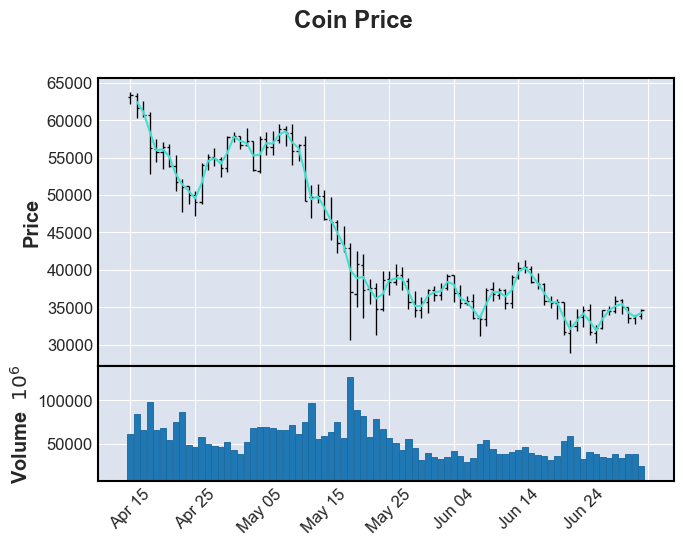

In [70]:
# Naive Price Graph - MPF-Type: OHLC i.e. Open-High-Low-Close-Diagramm (default)
#mpf.plot(data, type='ohlc', title='BTC')
# equal to: 
#mpf.plot(data, title='BTC')
# note: mpf gives warning for daily 2y records since it's so much data, it can't properly visualize all of them in tiny space
# to reduce amount of data, but want to see current daily data use data.tail(<desired number>)
# note: 'mav' = moving average; the higher the more abstract / less volatile it is
mpf.plot(data.tail(80), type = 'ohlc', title = 'Coin Price', mav = 2, volume = True)

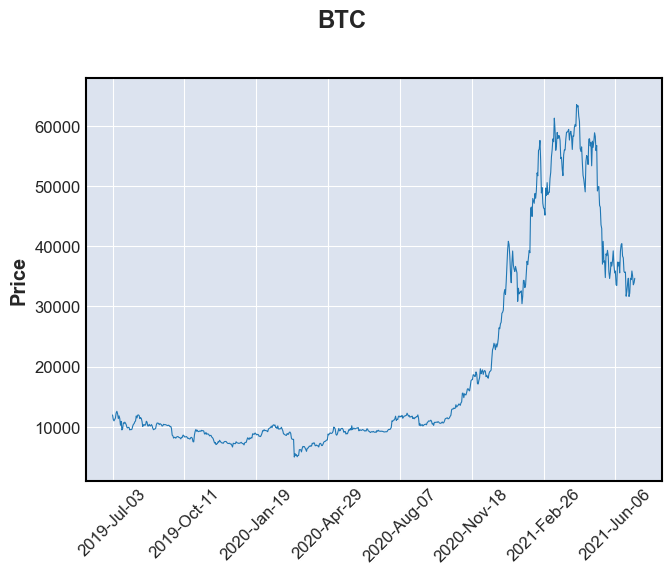

In [46]:
# Naive Price Graph - MPF-Type: Line
mpf.plot(data, type='line', title='BTC')

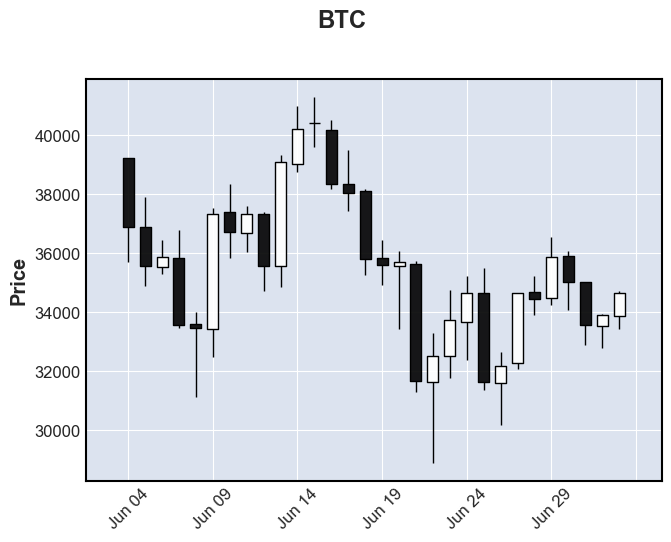

None

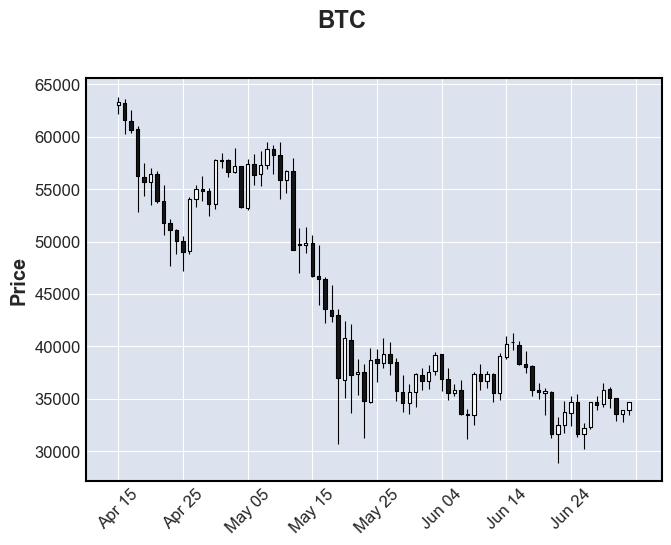

None

In [59]:
# Naive Price Graph - MPF-Type: Line
# note: mpf gives warning for daily 2y records since it's so much data, it can't properly visualize all of them in tiny space
# to reduce amount of data, but want to see current daily data use data.tail(<desired number>)
display(mpf.plot(data.tail(30), type='candle', title='BTC'))
display(mpf.plot(data.tail(80), type='candle', title='BTC'))

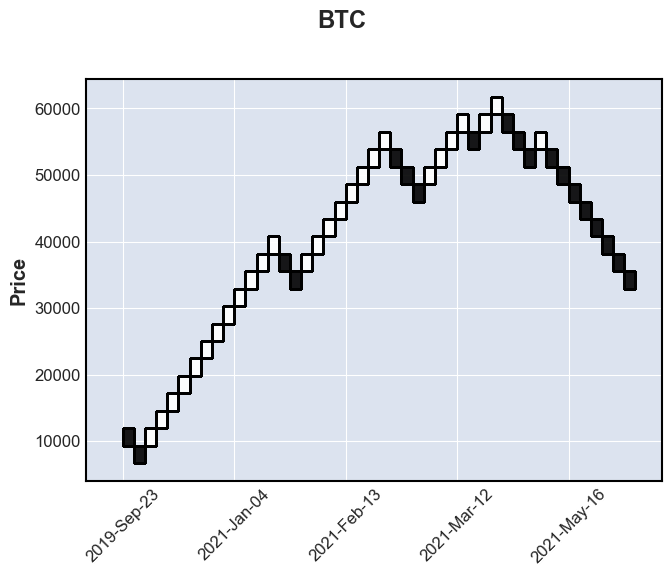

In [54]:
# Naive Price Graph - MPF-Type: Renko
mpf.plot(data, type='renko', title='BTC')

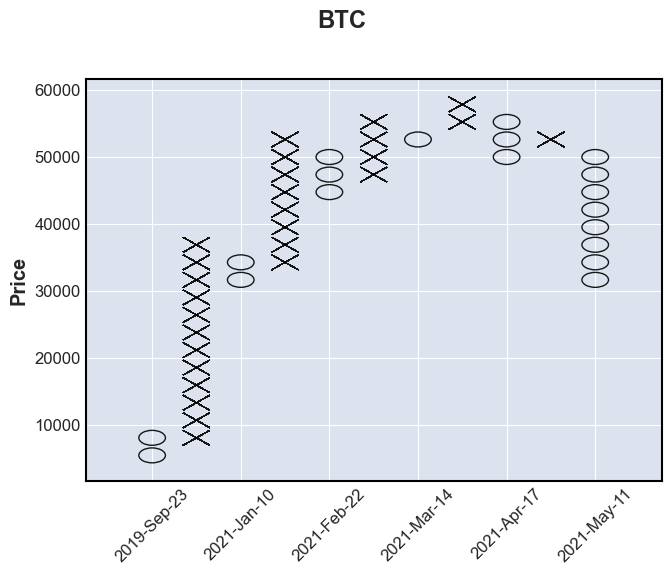

In [55]:
# Naive Price Graph - MPF-Type: PNF
mpf.plot(data, type='pnf', title='BTC')

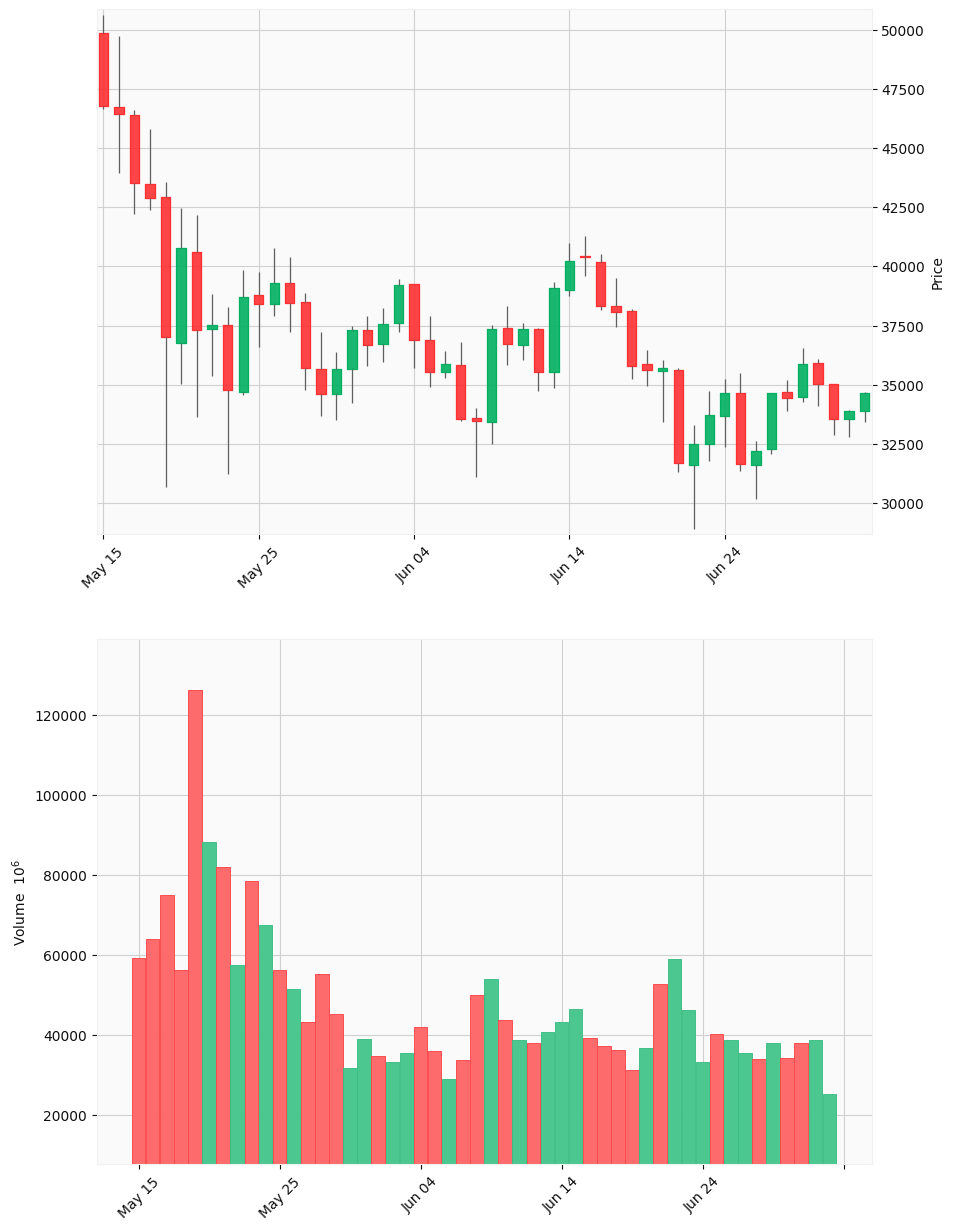

In [84]:
# Price Trends
# Create a figure, and two subplot Axes: one for the OHLC data, and one for Volume.

fig = mpf.figure(style = 'yahoo', figsize = (10,15))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

mpf.plot(data.tail(50), type = 'candle', tight_layout = True, ax = ax1, volume = ax2)
#fig

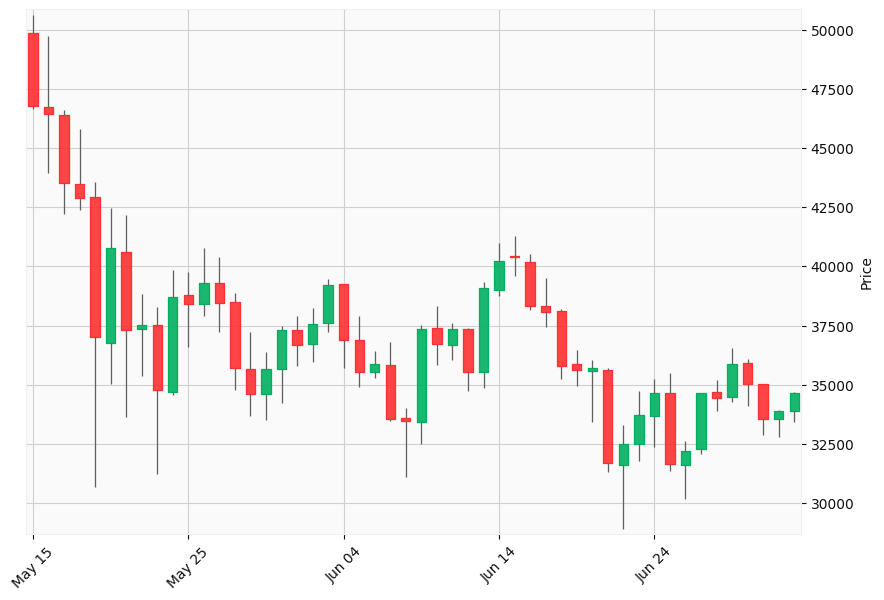

In [85]:
fig = mpf.figure(style = 'yahoo', figsize = (10,15))
ax1 = fig.add_subplot(2,1,1)
mpf.plot(data.tail(50), type = 'candle', tight_layout = True, ax = ax1)

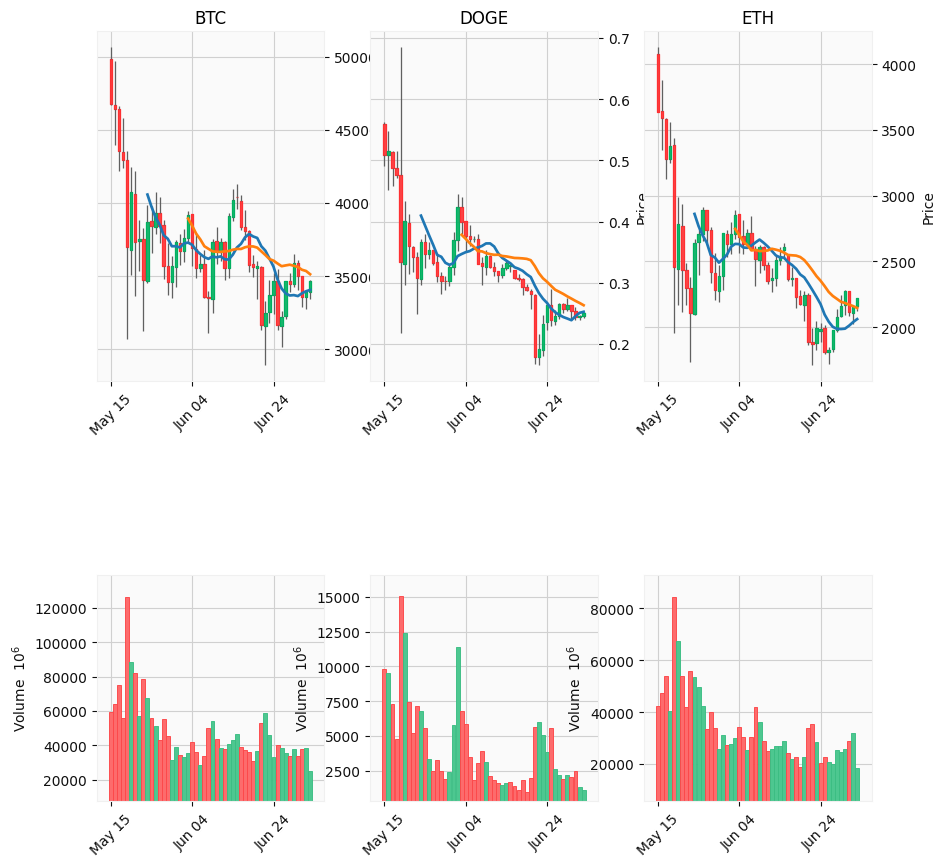

In [88]:
# All Coins Comparison
btc_data = pd.read_csv(btc_path + btc_daily_2y_file, parse_dates = True, index_col = 0)
btc_data.index.name = 'Date'
doge_data = pd.read_csv(doge_path + doge_daily_2y_file, parse_dates = True, index_col = 0)
doge_data.index.name = 'Date'
eth_data = pd.read_csv(eth_path + eth_daily_2y_file, parse_dates = True, index_col = 0)
eth_data.index.name = 'Date'
fig = mpf.figure(figsize = (10,10), style = 'yahoo')
ax1 = fig.add_subplot(2,3,1)
ax2 = fig.add_subplot(2,3,2)
ax3 = fig.add_subplot(2,3,3)

av1 = fig.add_subplot(3,3,7, sharex = ax1)
av2 = fig.add_subplot(3,3,8, sharex = ax1)
av3 = fig.add_subplot(3,3,9, sharex = ax3)
mpf.plot(btc_data.tail(50), type = 'candle', ax = ax1, volume = av1, mav = (10,20), axtitle = 'BTC')
mpf.plot(doge_data.tail(50), type = 'candle', ax = ax2, volume = av2, mav = (10,20), axtitle = 'DOGE')
mpf.plot(eth_data.tail(50), type = 'candle', ax = ax3, volume = av3, mav = (10,20), axtitle = 'ETH')

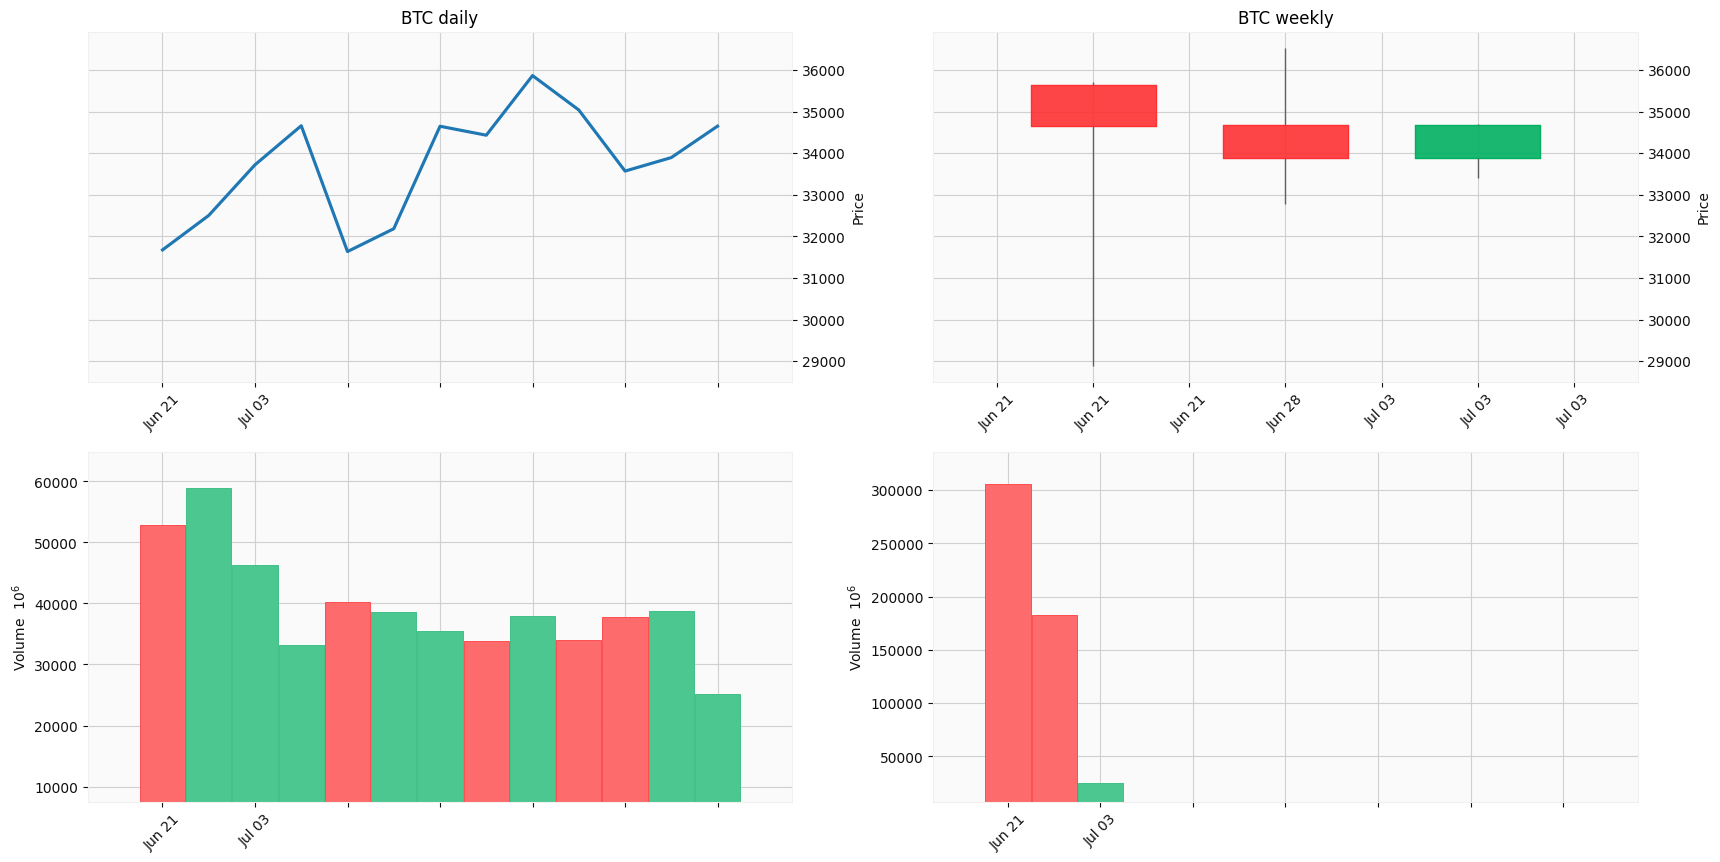

In [189]:
# Day Chart vs. Week Chart
btc_daily_data = pd.read_csv(btc_path + btc_daily_2y_file, parse_dates = True, index_col = 0)
btc_daily_data.index.name = 'Date'
btc_weekly_data = pd.read_csv(btc_path + btc_weekly_2y_file, parse_dates = True, index_col = 0)
btc_weekly_data.index.name = 'Date'
btc_daily_data = btc_daily_data.loc['2021-06-21':'2021-07-03']
btc_weekly_data = btc_weekly_data['2021-06-21':'2021-07-03']
fig = mpf.figure(figsize = (20,10), style = 'yahoo')
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)

av1 = fig.add_subplot(2,2,3, sharex = ax1)
av2 = fig.add_subplot(2,2,4, sharex = ax1)
mpf.plot(btc_daily_data, type = 'line', ax = ax1, volume = av1, axtitle = 'BTC daily')
mpf.plot(btc_weekly_data, type = 'candle', ax = ax2, volume = av2, axtitle = 'BTC weekly')

In [127]:
SA_results_path = '../results/'
results_file_name = 'sample-data.xlsx'
#results = openpyxl.load_workbook(SA_results_path + results_file_name) 
#sheet = results.active
#print(sheet.max_row, sheet.max_column)

results = pd.read_excel(SA_results_path + results_file_name, header = 0, index_col = False, keep_default_na = True)
results.sort_values(by = "Date")
results.head()

,Podcast,Title,Date,Sentence,Coin,Sentiment
159,AltcoinDaily,Title3,2021-05-15,w6ruj,ETH,bearish
160,AltcoinDaily,Title3,2021-05-15,e57,BTC,bullish
161,AltcoinDaily,Title3,2021-05-15,kj,DOGE,bearish
162,AltcoinDaily,Title3,2021-05-15,rsn,DOGE,bearish
156,AltcoinDaily,Title3,2021-05-15,fhb,BTC,bearish
...,...,...,...,...,...,...
134,AltcoinDaily,Title1,2021-06-28,ge,DOGE,bullish
135,AltcoinDaily,Title1,2021-06-28,rgerh,BTC,bullish
136,AltcoinDaily,Title1,2021-06-28,serg,ETH,bearish
14,Web3,This Week in Blockchain 1,2021-06-28,guk,ETH,bullish


,Podcast,Title,Date,Sentence,Coin,Sentiment
0,Web3,This Week in Blockchain 1,2021-06-28,rgerh,ETH,bullish
1,Web3,This Week in Blockchain 1,2021-06-28,tht,BTC,bearish
2,Web3,This Week in Blockchain 1,2021-06-28,fhf,DOGE,bullish
3,Web3,This Week in Blockchain 1,2021-06-28,jz,ETH,bullish
4,Web3,This Week in Blockchain 1,2021-06-28,guk,ETH,bearish


In [202]:
# Analytics

## by Coin
BTC_signals = results.query('Coin == "BTC"')
DOGE_signals = results.query('Coin == "DOGE"')
ETH_signals = results.query('Coin == "ETH"')
list_of_coins = ("BTC", "DOGE", "ETH")
# print(list_of_podcasts)
number_of_sentiments_per_coin = results.groupby('Coin').size()
#print(number_of_sentiments_per_coin)
### by Coin = BTC
btc_sentiments_total = BTC_signals['Sentiment'].value_counts(dropna=False)
#print(btc_sentiments_total)
### by Coin = DOGE
doge_sentiments_total = DOGE_signals['Sentiment'].value_counts(dropna=False)
#print(doge_sentiments_total)
### by Coin = ETH
eth_sentiments_total = ETH_signals['Sentiment'].value_counts(dropna=False)
#print(eth_sentiments_total)

## by Podcast 
# get all unique Podcasts (Podcast Name not Podcast Title)
# make query subsets for each unique podcast
list_of_podcasts = results.Podcast.unique()
# print(list_of_podcasts)
grouped_by_podcasts = results.groupby('Podcast')
#grouped_by_podcasts.head()
number_of_sentiments_per_podcasts = results.groupby('Podcast').size()
#print(number_of_sentiments_per_podcasts)

## by Date
list_of_dates = results.Date.unique()
#print(list_of_dates)
grouped_by_date = results.groupby('Date')
#grouped_by_date.head()
number_of_sentiments_per_date = results.groupby('Date').size()
#print(number_of_date)
sentiments_per_date = grouped_by_date['Sentiment'].value_counts(dropna=False)
#print(sentiments_per_date)

## by Sentiment
list_of_sentiments = ("bullish", "neutral", "bearish")
# print(list_of_sentiments)
number_of_sentiments = results.groupby('Sentiment').size()
#print(number_of_sentiments)

## Coin per Date
btc_grouped_by_date = BTC_signals.groupby('Date')
#btc_grouped_by_date.head()

## Coin per Sentiment
### Sentiment == Bullish
btc_bullish = BTC_signals.query('Sentiment == "bullish"')
#print(btc_bullish)
doge_bullish = DOGE_signals.query('Sentiment == "bullish"')
#print(doge_bullish)
eth_bullish = ETH_signals.query('Sentiment == "bullish"')
#print(eth_bullish)
### Sentiment == Bearish
btc_bearish = BTC_signals.query('Sentiment == "bearish"')
#print(btc_bearish)
doge_bearish = DOGE_signals.query('Sentiment == "bearish"')
#print(doge_bearish)
eth_bearish = ETH_signals.query('Sentiment == "bearish"')
#print(eth_bearish)
### Sentiment == Neutral
btc_neutral = BTC_signals.query('Sentiment == "neutral"')
#print(btc_neutral)
doge_neutral = DOGE_signals.query('Sentiment == "neutral"')
#print(doge_neutral)
eth_neutral = ETH_signals.query('Sentiment == "neutral"')
#print(eth_neutral)
### Sepcial Case: Sentiment == bearish && Sentiment == neutral
btc_bearishn = BTC_signals.query('Sentiment != "bullish"')
#print(btc_bearishn)
doge_bearishn = DOGE_signals.query('Sentiment != "bullish"')
#print(doge_bearishn)
eth_bearishn = ETH_signals.query('Sentiment != "bullish"')
#print(eth_bearishn)

## Coin per Sentiment per Date
### Sentiment == bullish
btc_bullish_by_date = btc_bullish.groupby('Date').size()
#btc_bullish_by_date.head()
doge_bullish_by_date = doge_bullish.groupby('Date').size()
#doge_bullish_by_date.head()
eth_bullish_by_date = eth_bullish.groupby('Date').size()
#eth_bullish_by_date.head()
### Sentiment == bearish
btc_bearish_by_date = btc_bearish.groupby('Date').size()
#btc_bearish_by_date.head()
doge_bearish_by_date = doge_bearish.groupby('Date').size()
#doge_bearish_by_date.head()
eth_bearish_by_date = eth_bearish.groupby('Date').size()
#eth_bearish_by_date.head()
#### Sentiment == bearish && neutral
btc_bearishn_by_date = btc_bearishn.groupby('Date').size()
#btc_bearishn_by_date.head()
doge_bearishn_by_date = doge_bearishn.groupby('Date').size()
#doge_bearishn_by_date.head()
eth_bearishn_by_date = eth_bearishn.groupby('Date').size()
#eth_bearishn_by_date.head()